### 勾配降下法
与えられた訓練データ  
  
$$
D = \{ (x_{1}, d_{1}), (x_{2}, d_{2}), ... ,  (x_{N}, d_{N})  \}
$$
  
を用いて計算された誤差関数 $E(w)$について、ネットワークのパラメータ(重みとバイアス)$w$について最小化することが、  
順伝搬型ニューラルネットの学習の目的になります。  
  
つまり、一般的には下記の誤差関数を扱うことになります。  
  
$$
E(w)=\frac{1}{2}\sum_{n=1}^{N}\parallel d_{n} - y(x_{n}, w) \parallel ^{2}
$$
  
多値分類(多クラス分類問題)についての誤差関数については下記のようになります。  
  
$$
E(w)=-\sum_{k=1}^{N}\sum_{k=1}^{K} d_{nk} \log y_{k}(x_{n}, w)
$$

### 学習のゴール
選んだ$E(w)$に対して最小値を与える$w=argmin_{w}E(w)$を求めることですが、前回の内容のように簡単には最小値を求めることができません。  
いくつもの極小値から、最小値の候補となる極小値を見つけ出すことが考えられますが、見つけた極小値が本当に最小値かどうかを評価する必要があります。  
たまたま見つけた極小値が、$E(w)$の大局的な最小値である可能性はほぼないです。  
  
したがって、何らかの初期値を与えて『繰り返し』$w$を更新して反復計算を行います。  
もっとも簡単な方法が、**勾配降下法**(gradient descent method)となります。勾配降下法の**勾配**(gradient)とは、
  
$$
  \nabla E = \frac{\partial E}{\partial w}  =\left[
    \frac{\partial E}{\partial w_{1}} \cdot \cdot \cdot \frac{\partial E}{\partial w_{M}}
  \right]^{T}
$$
  
勾配降下法は、現在の$w$を、負の勾配方向$- \nabla E$に少し動かして...という処理を何度も繰り返し行います。  
現在の重みを、$w^{t}$, 動かした後の重みを$w^{t+1}$とすると、
  
$$
w^{t+1} = w^{t} - \epsilon \nabla E
$$
  
この$\epsilon$を、**学習係数**(ステップ幅)といいます。  
学習係数の決定は大変重要な問題で、学習がうまくいくかどうかの要因の１つになります。  

### 確率的勾配降下法
全訓練サンプル$n=1, 2, ... , N$に対して計算される誤差関数$E(w)$について最小化すること、これを前述しましたが、  
このとき回帰やクラス分類のどれであっても$E(w)$は各サンプル1個だけについて計算される誤差$E_{n}$の和として、  
  
$$
E(w) = \sum_{n=1}^{N}E_{n}(w)
$$
  
と与えれらます。  
$w$の更新式として、$w^{t+1} = w^{t} - \epsilon \nabla E$では、この$E(w)$を用いています。  
この方法を、一般的に**バッチ学習**(batch learning)と呼びます。※エポック学習(epoch learning)ともいいます  
  
上記の場合は、**すべての訓練データ**を考慮していますが、この方法以外に、サンプルの一部、極端にはサンプルの１つだけを用いて  
パラメータの更新を行うことがあります。これを**確率的勾配降下法**(stochastic gradient descent)といい、頭文字をとって**SGD**と呼ばれています。  
  
この方法では、$w$の更新は１つのサンプル$k$について計算される誤差関数$E_{k}(w)$の勾配$\nabla E_{k}$を計算し、  
  
$$
w^{t+1} = w^{t} - \epsilon \nabla E_{k}
$$
  
のように$w$を更新します。次の$w^{t+1}$の更新の際は、別のサンプル$k^{'}$を取り出して、これを用いて同様に勾配$\nabla E_{k^{'}}$を評価し$w$を更新します。  
このようにしてサンプルを毎回取り替えて、$w$を更新していきます。  
  
バッチ学習の勾配降下法に対して、確率的勾配降下法にはいくつかの長所があるため、ディープラーニングの学習では確率的勾配降下法を利用するのが一般的です。  

### ミニバッチの利用
規模が大きくなってくると、特にニューラルネットワークの学習には大きなコスト(計算時間)を要します。  
そこで計算を効率よくするために、計算機がもつ並列計算資源の利用が不可欠となってきます。  
そのために、サンプル一つ単位で重みを更新するのではなく、少数のサンプルの集合を**ひとまとめ**にして、その単位で重みを更新します。  
  
このひとまとめの集合を、**ミニバッチ**(mini-batch)といいます。  
  
具体的には、下記のような処理をします。
  
・まず１つのミニバッチを$D_{t}$と書くことにします  
※少数のサンプルの集合を指していて、$t$回目の更新ごとにそのサンプル集合が変わることを示しています  
  
・$D_{t}$の含むサンプルに対する誤差  
  
$$
E_{t}(w) = \frac{1}{N_{t}}\sum_{n \in D_{t}}E_{n}(w)
$$
  
を計算して、その勾配の方向にパラメータを更新します。  
$N_{t}=\mid D_{t} \mid$はこのミニバッチが含むサンプル数となります。  
  
このときに、$E_{t}(w)$を$N_{t}$で正規化しておくと、ミニバッチのサンプルのサイズ(サンプル数)を変えたときに、  
それに合わせて学習係数を調整しなければならない面倒くささを低減することができます。  
  
確率的降下勾配法のメリットと並列計算資源のトレードオフを考えて、うまく設定します。  
大体ミニバッチのサイズが、10~100(50〜256)が一般的ですが、目的とゴールによって様々。  
  
ミニバッチのサイズを大きくすればするほど、ミニバッチ間で計算される勾配のばらつきが小さくなり、  
$w$の更新量が安定するので、学習係数$\epsilon$を大きくでき、それだけ学習が速く進むことになります。  
しかし一方で、ミニバッチサイズを$N$倍しても、$\epsilon$を$N$倍大きくすることはできないので、結果としてトータルの計算速度は低下します。

### 汎化性能と過学習
ここまでは、訓練データに対する誤差(誤差関数の値)を小さくすること、最小化することを考えてきました。  
学習の本当の目的は、与えられた訓練データではなくて、これから与えられるはずの『まだ知らない』データ$X$について正しい推定ができることです。  
  
訓練データに対する誤差を**訓練誤差**(training error)、『まだ知らない』データ、正しく言えばサンプルの母集団に対する誤差の期待値を、  
**汎化誤差**(generalization error)といいます。  
  
汎化誤差を小さくすることがベストですが、汎化誤差は統計的な期待値で、訓練誤差のようには計算できません。(例えば、繰り返して訓練できない)  
そこで訓練データとは別のサンプルデータを用意します。このサンプルデータに対して訓練誤差と同じ方法で計算される誤差を、  
汎化誤差の"目安"とします。※この目安を、仮にテスト誤差とします  
  
訓練誤差は一般的に、パラメータを更新する後に単調に減少して収束していきます。(学習が進んでいるから)  
一方で、テスト誤差は学習の前半では訓練誤差とほぼ同じように減少しますが、学習の後半では徐々に解離していきます。  
理想は、このテスト誤差が訓練誤差とよく近似できていることです。(後述)  
  
このときに、学習中盤以降に、訓練誤差とテスト誤差を大きく解離していくパターンがあり、  
このパターンを、**過学習(over learning)**(過適合:over fitting)といいます。  
  
パラメータ更新に伴って、訓練誤差に対してテスト誤差が大きくなっていくと、むしろそれ以上の訓練・学習は有効ではないために、  
早期に学習を切り上げるのがベターです。そのとき、**早期打ち切り**(early stopping)を行います。

### 過学習の回避
**ドロップアウト**は、多層ニューラルネットのユニットを確率的に選別して学習する方法です。  
多くの場合、大変良い結果が得られるために現在広く扱われています。ドロップアウトは、ネットワークの学習過程と学習後の推論過程を、  
以下のように修正していきます。  
  
・学習時、中間層の各層と入力層のユニットを決まった割合$p$でランダムに選出する(選出されたもの以外は無視)  
・選出されたユニットだけのニューラルネットで学習を進める  
・訓練サンプルをネットワークに順伝搬計算を行って、誤差を求め、逆伝搬計算を行って誤差の勾配を計算し、重みを更新  
  
※ミニバッチを用いている場合、ミニバッチ単位でユニットを選びなおします。  
ユニットの選出確率は、層ごとに変化させても問題ありません。  
  
学習終了時の推論時には、すべてのユニットを使って順伝搬計算を行います。  
ただし、ドロップアウトで無効化の対象とした層のユニットは、すべて一律に出力を$p$倍します。  
  
ドロップアウトの目的は、学習時にネットワークの自由度を強制的に小さくし、過学習を避けることです。  
ドロップアウト時のネットワークを複数独立に訓令し、推論時にそれらの結果を平均するのと同じ効果があります。  

**モメンタム(モーメンタム)**(momentum)という方法もあり、勾配降下法の収束性能を向上させる方法となります。  
これは重みの修正量に、ミニバッチ$t-1$に対する重みの修正量を$\delta w^{t-1} \equiv w^{t} - w^{t-1}$とすれば、ミニバッチの更新を  
  
$$
w^{t+1} = w^{t} - \epsilon \nabla E_{t} + \mu \delta w^{t-1}
$$
  
と定義します。
$\mu$はハイパーパラメータの一つになり、通常は、0.5~0.9の範囲から選択します。

## kerasの実装編

In [2]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation

In [3]:
# SGD
model = Sequential()
model.add(Dense(64, kernel_initializer='uniform', input_shape=(10,)))
model.add(Activation('tanh'))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
Total params: 704
Trainable params: 704
Non-trainable params: 0
_________________________________________________________________


### 前回の順伝搬型ニューラルネットに、SGDを用いて再度学習させてみる

In [5]:
# -*- coding: utf-8 -*-
import numpy as np

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

In [6]:
# MNIST データセットを取り込む
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 変換前：28 x 28 の2次元配列 x 60,000
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
# 28*28の２次元配列を、784要素の1次元配列に変換する＆256階調を[0, 1]に正規化
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test  = X_test.reshape(10000, 784).astype('float32') / 255

In [14]:
# 0~9の数字を、10次元で表現する
y_train_array = np_utils.to_categorical(y_train, 10)
y_test_array  = np_utils.to_categorical(y_test, 10)

In [16]:
# モデルの箱(空箱)
model_non_drop_out_with_SGD = Sequential()

# 入力層
# - ノード数：512
# - 入力：784次元
# - 活性化関数：relu
model_non_drop_out_with_SGD.add(Dense(512, input_dim=784))
model_non_drop_out_with_SGD.add(Activation('relu'))

# 隠れ層
# - ノード数：512
# - 活性化関数：relu
model_non_drop_out_with_SGD.add(Dense(512))
model_non_drop_out_with_SGD.add(Activation('relu'))

# 出力層
# - ノード数：10
# - 活性化関数：softmax
model_non_drop_out_with_SGD.add(Dense(10))
model_non_drop_out_with_SGD.add(Activation('softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_non_drop_out_with_SGD.compile(loss='categorical_crossentropy',
                                    optimizer=sgd,
                                    metrics=['accuracy']
                                   )

In [17]:
# モデルの要約を出力
model_non_drop_out_with_SGD.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
_________________________________________________________________
activation_11 (Activation)   (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

In [18]:
# 学習
# - バッチサイズ：128
# - 学習の繰り返し回数：20
model_non_drop_out_with_SGD.fit(X_train, y_train_array,
                       batch_size=128,
                       epochs=20,
                       verbose=1,
                       validation_data=(X_test, y_test_array))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.4241 - accuracy: 0.8856 - val_loss: 0.2208 - val_accuracy: 0.9375
Epoch 2/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.1930 - accuracy: 0.9436 - val_loss: 0.1568 - val_accuracy: 0.9532
Epoch 3/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.1416 - accuracy: 0.9600 - val_loss: 0.1236 - val_accuracy: 0.9635
Epoch 4/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.1113 - accuracy: 0.9679 - val_loss: 0.1072 - val_accuracy: 0.9681
Epoch 5/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0905 - accuracy: 0.9742 - val_loss: 0.0939 - val_accuracy: 0.9711
Epoch 6/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0757 - accuracy: 0.9784 - val_loss: 0.0894 - val_accuracy: 0.9732
Epoch 7/20
60000/60000 [==============================] - 6s 10

In [19]:
# 評価
score = model_non_drop_out_with_SGD.evaluate(X_test, y_test_array, verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Test loss : 0.060966521442710656
Test accuracy : 0.9815000295639038


### ミニバッチを変更した時の計算速度比較 & Eealy Stopping

In [21]:
from keras.callbacks import EarlyStopping

In [22]:
# Early-stopping 
early_stopping = EarlyStopping(patience=0, verbose=1) 

In [23]:
# 学習
# - バッチサイズ：10
# - 学習の繰り返し回数：20
model_non_drop_out_with_SGD.fit(X_train, y_train_array,
                                batch_size=10,
                                epochs=20,
                                verbose=1,
                                validation_data=(X_test, y_test_array),
                                callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2271 - accuracy: 0.9312 - val_loss: 0.1266 - val_accuracy: 0.9633
Epoch 2/20
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1114 - accuracy: 0.9663 - val_loss: 0.1070 - val_accuracy: 0.9675
Epoch 3/20
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0781 - accuracy: 0.9759 - val_loss: 0.0979 - val_accuracy: 0.9707
Epoch 4/20
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0603 - accuracy: 0.9807 - val_loss: 0.0883 - val_accuracy: 0.9736
Epoch 5/20
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0490 - accuracy: 0.9843 - val_loss: 0.0971 - val_accuracy: 0.9721
Epoch 00005: early stopping


In [24]:
# 評価
score = model_non_drop_out_with_SGD.evaluate(X_test, y_test_array, verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Test loss : 0.0971373441231146
Test accuracy : 0.972100019454956


In [25]:
# 学習
# - バッチサイズ：512
# - 学習の繰り返し回数：20
model_non_drop_out_with_SGD.fit(X_train, y_train_array,
                                batch_size=512,
                                epochs=20,
                                verbose=1,
                                validation_data=(X_test, y_test_array),
                                callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0712 - val_accuracy: 0.9797
Epoch 2/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0192 - accuracy: 0.9945 - val_loss: 0.0682 - val_accuracy: 0.9807
Epoch 3/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0168 - accuracy: 0.9955 - val_loss: 0.0670 - val_accuracy: 0.9803
Epoch 4/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0154 - accuracy: 0.9960 - val_loss: 0.0659 - val_accuracy: 0.9806
Epoch 5/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0145 - accuracy: 0.9964 - val_loss: 0.0656 - val_accuracy: 0.9807
Epoch 6/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0138 - accuracy: 0.9967 - val_loss: 0.0656 - val_accuracy: 0.9802
Epoch 7/20
60000/60000 [==============================] - 5s 89us/

In [26]:
# 評価
score = model_non_drop_out_with_SGD.evaluate(X_test, y_test_array, verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Test loss : 0.06507510154138872
Test accuracy : 0.9814000129699707


### 加えてドロップアウトを加えてみる
rate = 1-keep_probとなっており、 tensorflowでは、keep_probが扱われ、Kerasは rateになる

In [54]:
from keras.layers import Dropout

In [55]:
# モデルの箱(空箱)
model_with_SGD = Sequential()

# 入力層
# - ノード数：512
# - 入力：784次元
# - 活性化関数：relu
model_with_SGD.add(Dense(512, input_dim=784))
model_with_SGD.add(Activation('relu'))
model_with_SGD.add(Dropout(0.1)) # 入力層なので、ドロップアウトを0.9

# 隠れ層
# - ノード数：512
# - 活性化関数：relu
model_with_SGD.add(Dense(512))
model_with_SGD.add(Activation('relu'))
model_with_SGD.add(Dropout(0.5)) # 中間層なので、ドロップアウトを0.5

# 出力層
# - ノード数：10
# - 活性化関数：softmax
model_with_SGD.add(Dense(10))
model_with_SGD.add(Activation('softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_with_SGD.compile(loss='categorical_crossentropy',
                       optimizer=sgd,
                       metrics=['accuracy']
                      )

In [56]:
model_with_SGD.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_27 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_28 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)              

In [57]:
# 学習
# - バッチサイズ：128
# - 学習の繰り返し回数：20
his = model_with_SGD.fit(X_train, y_train_array,
                         batch_size=128,
                         epochs=20,
                         verbose=1,
                         validation_data=(X_test, y_test_array),
                         callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 215us/step - loss: 0.5022 - accuracy: 0.8494 - val_loss: 0.2160 - val_accuracy: 0.9383
Epoch 2/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.2289 - accuracy: 0.9330 - val_loss: 0.1529 - val_accuracy: 0.9541
Epoch 3/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.1729 - accuracy: 0.9494 - val_loss: 0.1251 - val_accuracy: 0.9623
Epoch 4/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.1389 - accuracy: 0.9592 - val_loss: 0.1092 - val_accuracy: 0.9676
Epoch 5/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.1182 - accuracy: 0.9646 - val_loss: 0.0946 - val_accuracy: 0.9722
Epoch 6/20
60000/60000 [==============================] - 14s 228us/step - loss: 0.1028 - accuracy: 0.9699 - val_loss: 0.0845 - val_accuracy: 0.9750
Epoch 7/20
60000/60000 [==============================] -

In [58]:
# 評価
score = model_with_SGD.evaluate(X_test, y_test_array, verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Test loss : 0.05748828273621621
Test accuracy : 0.9825000166893005


In [59]:
import matplotlib.pyplot as plt

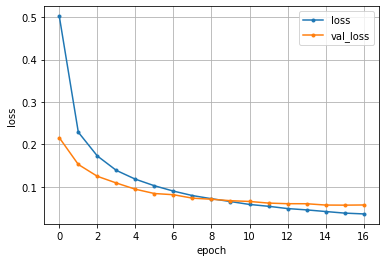

In [60]:
loss = his.history['loss']
val_loss = his.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss, marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### 今回ドロップアウトの恩恵は期待するほどではなかった
データが綺麗(特徴を掴みやすい)＆複雑なニューラルネットでもないため？？？  
下記の参考リンクでは、ドロップアウトによる過学習(過適合)を抑制できる例があります(参考までに)  
[Dropoutによる過学習の抑制](https://medium.com/axinc/dropout%E3%81%AB%E3%82%88%E3%82%8B%E9%81%8E%E5%AD%A6%E7%BF%92%E3%81%AE%E6%8A%91%E5%88%B6-be5b9bba7e89)

## 余談(参考)

### [Kerasが用意している最適化関数について](https://keras.io/ja/optimizers/)

**非常に参考となるリンク [勾配降下法の最適化アルゴリズムを概観する](https://postd.cc/optimizing-gradient-descent/)**

[Kerasに実装されている最適化アルゴリズムのソースコードの一部](https://github.com/keras-team/keras/blob/master/keras/optimizers.py#L130)
  
`from keras.mixed_precision import loss_scale_optimizer`  # pylint: disable=g-import-not-at-top  
`  all_classes = {`  
`      'adadelta': adadelta_v2.Adadelta,`  
`      'adagrad': adagrad_v2.Adagrad,`  
`      'adam': adam_v2.Adam,`  
`      'adamax': adamax_v2.Adamax,`  
`      'nadam': nadam_v2.Nadam,`  
`      'rmsprop': rmsprop_v2.RMSprop,`  
`      'sgd': gradient_descent_v2.SGD,`  
`      'ftrl': ftrl.Ftrl,`  
`      'lossscaleoptimizer': loss_scale_optimizer.LossScaleOptimizer,`  
`      # LossScaleOptimizerV1 deserializes into LossScaleOptimizer, as`  
`      # LossScaleOptimizerV1 will be removed soon but deserializing it will`  
`      # still be supported.`  
`      'lossscaleoptimizerv1': loss_scale_optimizer.LossScaleOptimizer,`  
`  }`  

**引数に、文字列、例えば"adam"とか"sgd"とかを設定すれば、バックエンドにあるtensorflowのアルゴリズムを無意識的に扱える**

**Kerasオプティマイザ(最適化アルゴリズム)にある、SGDの扱い方**  
`keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)`  
  
確率的勾配降下法オプティマイザについて  

モーメンタム，学習率減衰，Nesterov momentumをサポートした確率的勾配降下法の引数一覧  
  
lr: 0以上の浮動小数点数．学習率．  
momentum: 0以上の浮動小数点数．モーメンタム．  
decay: 0以上の浮動小数点数．各更新の学習率減衰．  
nesterov: 真理値. Nesterov momentumを適用するかどうか．  
  
[Keras SGDのソースコード  ](https://github.com/keras-team/keras/blob/1d49681f825d2d4282719efd27e13aca441b39c2/keras/optimizer_v1.py#L158)  
`(中略)`  
`  def get_updates(self, loss, params):`  
`    grads = self.get_gradients(loss, params)`  
`    self.updates = [tf.compat.v1.assign_add(self.iterations, 1)]`  
`    lr = self.lr`  
`    if self.initial_decay > 0:`  
`      lr = lr * (  # pylint: disable=g-no-augmented-assignment`  
`          1. /`  
`          (1. +`  
`           self.decay * tf.cast(self.iterations, K.dtype(self.decay))))`  
`    # momentum`  
`    moments = self._create_all_weights(params)`  
`    for p, g, m in zip(params, grads, moments):`  
`      v = self.momentum * m - lr * g  # velocity`  
`      self.updates.append(tf.compat.v1.assign(m, v))`  
`      if self.nesterov:`  
`        new_p = p + self.momentum * v - lr * g`  
`      else:`  
`        new_p = p + v`  
`      # (中略)`